In [60]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [61]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv("Resources/crypto_market_data.csv")

# Display sample data
df_market_data.head(10)

,coin_id,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
1,ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
2,tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
3,ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
4,bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
5,binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
6,chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
7,cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
8,litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408
9,bitcoin-cash-sv,0.92530,3.29641,-1.86656,2.88926,-24.87434,7.42562,93.73082


In [62]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [63]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

---

### Prepare the Data

In [64]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# Extracting 'coin_id'
coin_ids = df_market_data['coin_id']
numeric_data = df_market_data.drop(columns=['coin_id'])

# Apply StandardScaler to numeric data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

In [65]:
# Create a DataFrame with the scaled data
# Copy the crypto names from the original data
# Set the coinid column as index
scaled_crypto_df = pd.DataFrame(scaled_data, columns=numeric_data.columns, index=coin_ids)

# Display sample data
scaled_crypto_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [66]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [67]:
# Create an empty list to store the inertia values
inertia_values1 = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_crypto_df)
    inertia_values1.append(model.inertia_)

In [68]:
# Create a dictionary with the data to plot the Elbow curve
elbow_curve_data = {
    'k_values': list(k_values),
    'inertia_values': inertia_values1
}

# Create a DataFrame with the data to plot the Elbow curve


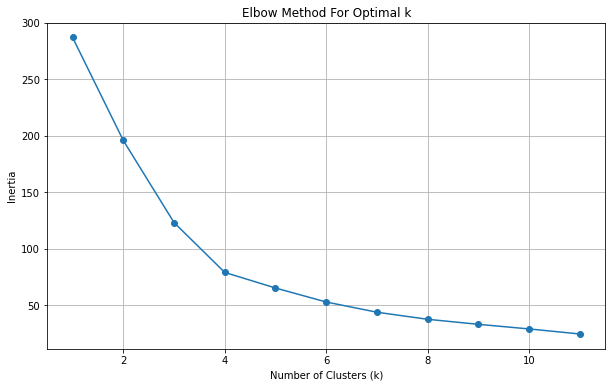

In [69]:
import matplotlib.pyplot as plt
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_curve_data['k_values'], elbow_curve_data['inertia_values'], marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [70]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=42)

In [71]:
# Fit the K-Means model using the scaled data
# Predict the clusters to group the cryptocurrencies using the scaled data
df_market_data['Cluster'] = kmeans.fit_predict(scaled_data)

In [72]:
# Print the resulting array of cluster values.
df_market_data["Cluster"]

0     2
1     2
2     0
3     0
4     2
5     2
6     2
7     2
8     2
9     0
10    0
11    0
12    0
13    2
14    0
15    2
16    0
17    0
18    2
19    0
20    0
21    2
22    0
23    0
24    0
25    0
26    0
27    0
28    2
29    0
30    0
31    0
32    3
33    2
34    0
35    0
36    1
37    0
38    0
39    0
40    0
Name: Cluster, dtype: int32

In [73]:
# Create a copy of the DataFrame
clustered_data = df_market_data.copy()

In [74]:
# Display sample data
df_market_data.head()

,coin_id,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
0,bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,2
1,ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,2
2,tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
3,ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
4,bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,2


In [75]:
# Create a scatter plot using hvPlot
plot = df_market_data.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='Cluster',
    hover_cols=['coin_id'],  # Use 'coin_id' or another column name that stores the cryptocurrency names
    colormap='viridis',
    title='Cryptocurrency Clusters based on 24h and 7d Price Change',
    width=800,
    height=400
)

# Display the plot
plot

:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [76]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [77]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
principal_components = pca.fit_transform(scaled_data)
# View the first five rows of the DataFrame. 
pca_df = pd.DataFrame(data=principal_components,
                      columns=['PC1', 'PC2', 'PC3'],
                      index=df_market_data['coin_id'])

pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [78]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print("Explained Variance (per component):", explained_variance)
print("Total Explained Variance:", sum(explained_variance) * 100, "%")  # Display as percentage

Explained Variance (per component): [0.3719856  0.34700813 0.17603793]
Total Explained Variance: 89.50316570309842 %


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 89.5%

---

### Find the Best Value for k Using the PCA Data

In [79]:
# Create a list with the number of k-values from 1 to 11
k_values = range(1, 12)

In [80]:
# Create an empty list to store the inertia values
inertia_values2 = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia_values2.append(kmeans.inertia_)


In [81]:
# Create a dictionary with the data to plot the Elbow curve
elbow_curve_data = {
    'k_values': list(k_values),
    'inertia_values': inertia_values2
}
# Create a DataFrame with the data to plot the Elbow curve


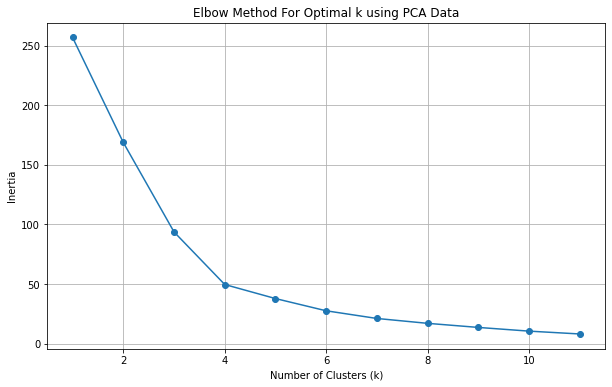

In [82]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_curve_data['k_values'], elbow_curve_data['inertia_values'], marker='o')
plt.title('Elbow Method For Optimal k using PCA Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [83]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=3, random_state=42)

In [84]:
# Fit the K-Means model using the PCA data
kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=42)

In [85]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_labels = kmeans.predict(pca_df)
# Print the resulting array of cluster values.
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0])

In [86]:
# Create a copy of the DataFrame with the PCA data
pca_df = pd.DataFrame(data=pca_df, columns=['PC1', 'PC2', 'PC3'], index=df_market_data['coin_id'])
pca_df['Cluster'] = cluster_labels

# Add a new column to the DataFrame with the predicted clusters


# Display sample data
pca_df

,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,0
binancecoin,-0.516534,1.388377,0.804071,0
chainlink,-0.450711,0.517699,2.846143,0
cardano,-0.345600,0.729439,1.478013,0
litecoin,-0.649468,0.432165,0.600303,0


In [87]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
plot = pca_df.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='Cluster',
    hover_cols=['coin_id'],  # Make sure this column contains the cryptocurrency names
    colormap='viridis',
    title='Cluster Visualization of Cryptocurrencies',
    width=800,
    height=400
)

# Display the plot
plot

:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

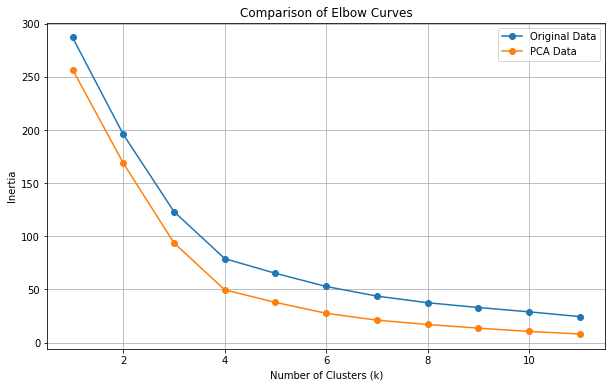

In [88]:
# Composite plot to contrast the Elbow curves
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values1, label='Original Data', marker='o')
plt.plot(k_values, inertia_values2, label='PCA Data', marker='o')
plt.title('Comparison of Elbow Curves')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.legend()
plt.grid(True)
plt.show()

In [93]:
clustering =pca_df["Cluster"].reset_index().drop(columns=["coin_id"]).squeeze()
print(clustering)


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    2
33    0
34    0
35    0
36    1
37    0
38    0
39    0
40    0
Name: Cluster, dtype: int32


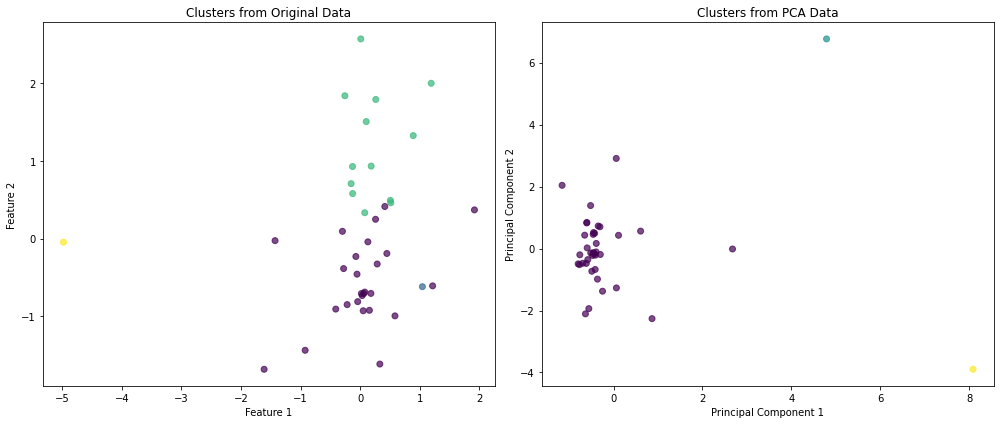

In [103]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
# Plotting both clustering results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Original data scatter plot
ax1.scatter(scaled_data[:, 0], scaled_data[:, 1], c=df_market_data["Cluster"], cmap='viridis', marker='o', alpha=0.7)
ax1.set_title('Clusters from Original Data')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

# PCA data scatter plot
ax2.scatter(pca_df[["PC1"]], pca_df[["PC2"]], c=clustering, cmap='viridis', marker='o', alpha=0.7)
ax2.set_title('Clusters from PCA Data')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** When using K-means with fewer features, there tends to be less number of clusters, and is less variable.